/usr/lib64/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


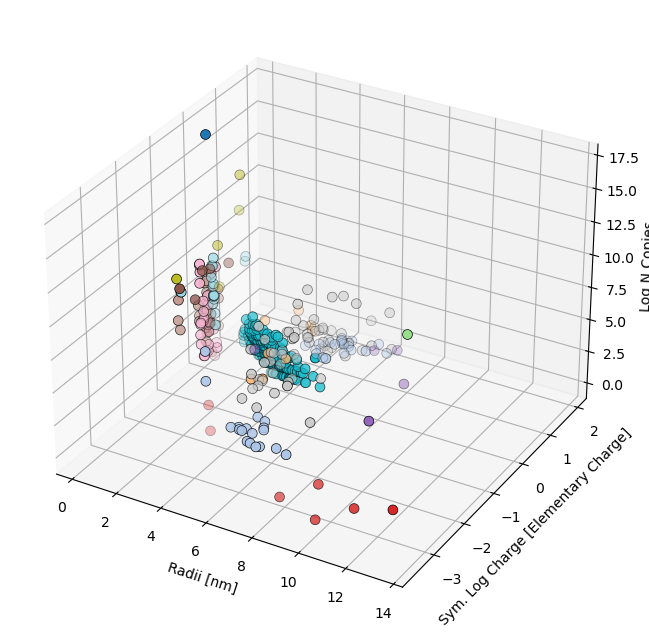

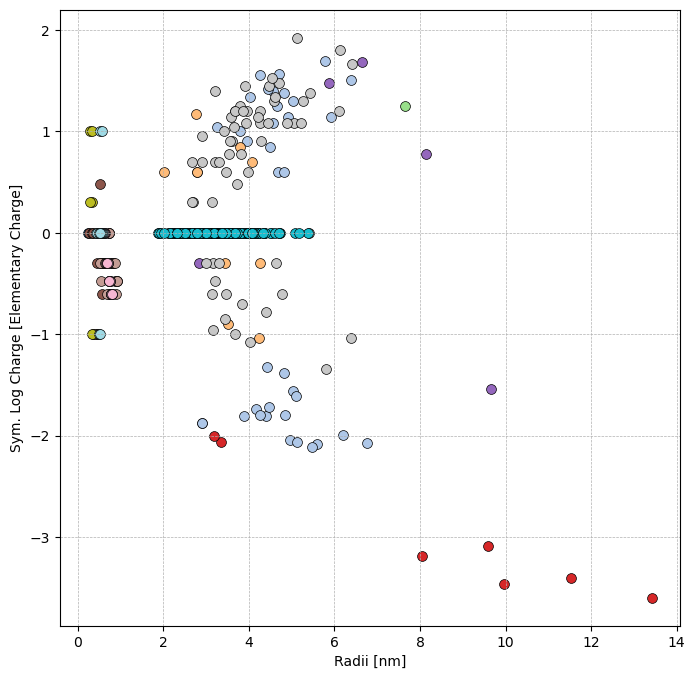

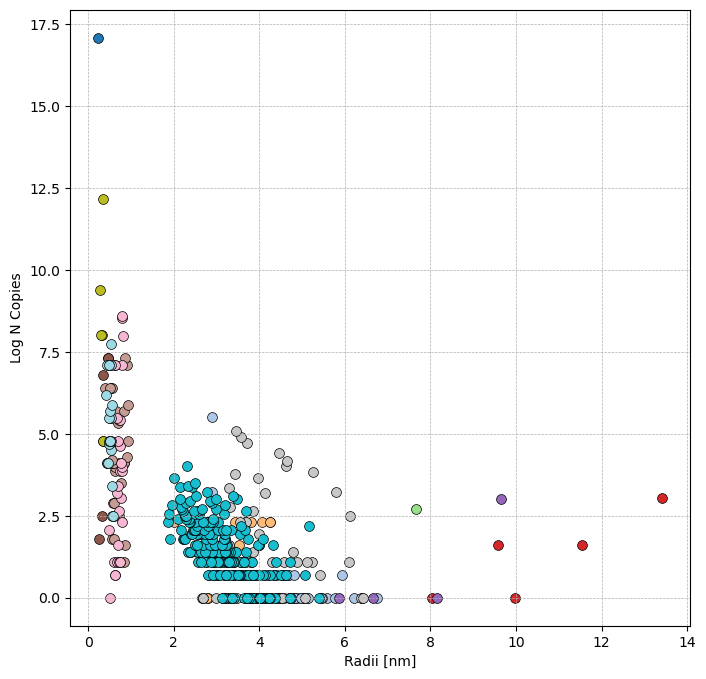

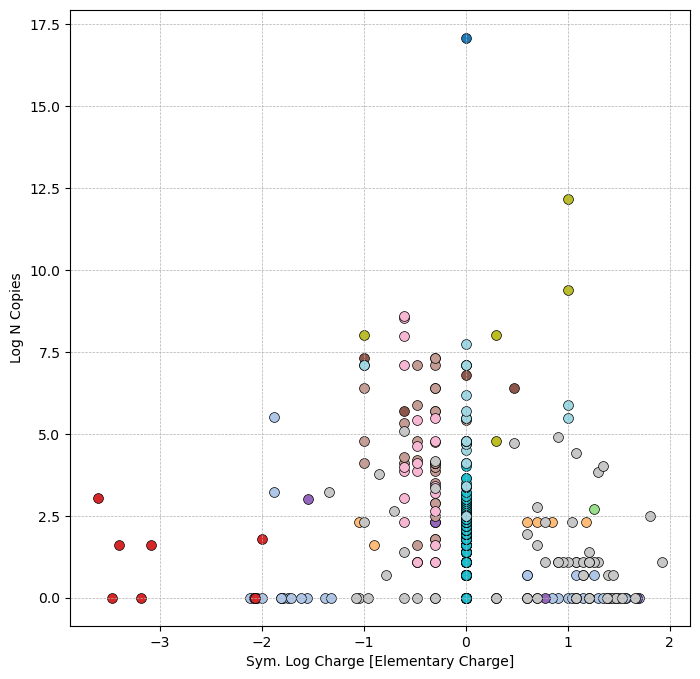

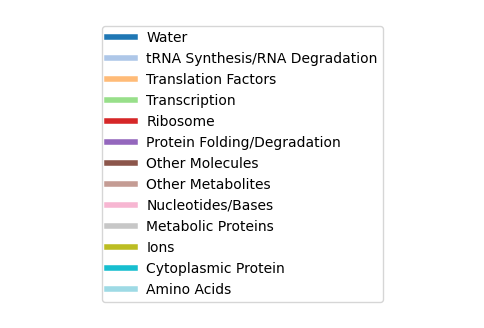

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the Excel file
file_path = "SpeciesList_Annotated.ods"
df = pd.read_excel(file_path)

# Extract data from columns using positional indices
radii = pd.to_numeric(df.iloc[:, 4], errors='coerce')
charge = pd.to_numeric(df.iloc[:, 1], errors='coerce')
n_copies = pd.to_numeric(df.iloc[:, 3], errors='coerce')
tags = df.iloc[:, 5]

# Custom symmetric log function
def symlog(x, linthresh=1):
    is_negative = x < 0
    abs_x = np.abs(x)
    abs_x = np.where(x == 0, 0, np.where(abs_x < linthresh, linthresh, np.log10(abs_x)))
    return np.where(is_negative, -abs_x, abs_x)

# Transform charges
charge_transformed = symlog(charge)

# Convert tags to discrete colors
unique_tags = tags.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_tags)))
tag_to_color = {tag: color for tag, color in zip(unique_tags, colors)}
tag_colors = tags.map(tag_to_color)

# 3D Orthographic Plot
fig_3d = plt.figure(figsize=(8, 8))
ax1 = fig_3d.add_subplot(111, projection='3d')
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax1.scatter(radii[mask], charge_transformed[mask], np.log(n_copies[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax1.set_xlabel('Radii [nm]')
ax1.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax1.set_zlabel('Log N Copies')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.ticklabel_format(style='plain', axis='z', scilimits=(0,0))
ax1.view_init(elev=30, azim=300)
ax1.grid(True)
ax1.set_facecolor('white')
fig_3d.savefig('Full_Number_3D_Orthographic_Plot.svg')
plt.show()

# 2D Projection - Radii and Charge
fig_2d_rc = plt.figure(figsize=(8, 8))
ax2 = fig_2d_rc.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax2.scatter(radii[mask], charge_transformed[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax2.set_xlabel('Radii [nm]')
ax2.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_facecolor('white')
fig_2d_rc.savefig('Full_Number_2D_Projection_Radii_Charge.svg')
plt.show()

# 2D Projection - Log N Copies & Radii
fig_2d_ac = plt.figure(figsize=(8, 8))
ax3 = fig_2d_ac.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax3.scatter(radii[mask], np.log(n_copies[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax3.set_xlabel('Radii [nm]')
ax3.set_ylabel('Log N Copies')
ax3.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.set_facecolor('white')
fig_2d_ac.savefig('Full_Number_2D_Projection_Radii_Abundance.svg')
plt.show()

# 2D Projection - Log N Copies & Sym. Log Charge
fig_2d_ar = plt.figure(figsize=(8, 8))
ax4 = fig_2d_ar.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax4.scatter(charge_transformed[mask], np.log(n_copies[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax4.set_xlabel('Sym. Log Charge [Elementary Charge]')
ax4.set_ylabel('Log N Copies')
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
ax4.set_facecolor('white')
fig_2d_ar.savefig('Full_Number_2D_Projection_Charge_Abundance.svg')
plt.show()

# Creating and saving a separate plot for the legend
fig_legend = plt.figure(figsize=(6, 4))
ax_legend = fig_legend.add_subplot(111)
# Create dummy lines for the legend
legend_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in tag_to_color.values()]
# Add the legend to the plot
ax_legend.legend(legend_lines, unique_tags, loc='center')
ax_legend.axis('off')  # Hide the axes
fig_legend.savefig('Full_Number_Plot_Legend.svg')
plt.show()

/usr/lib64/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


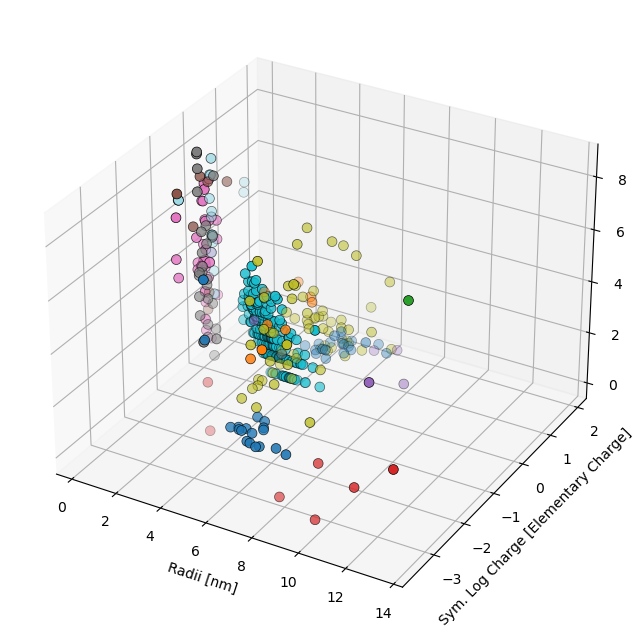

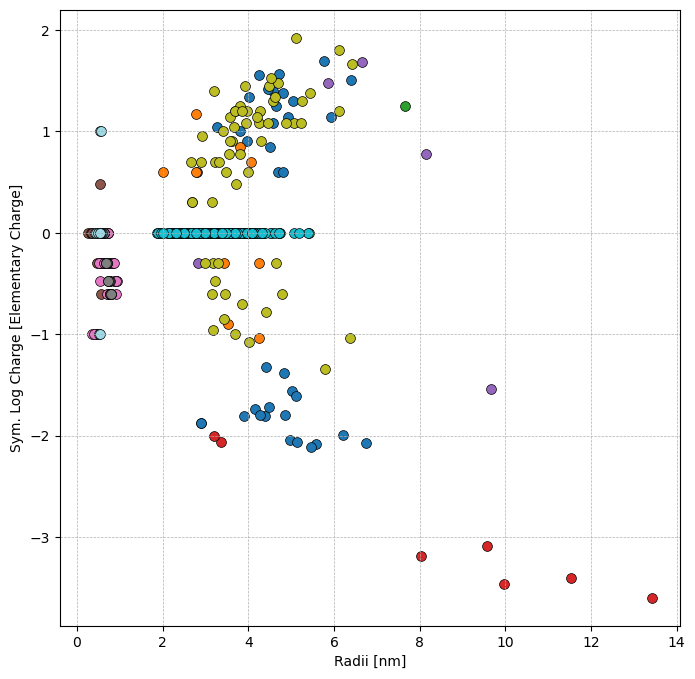

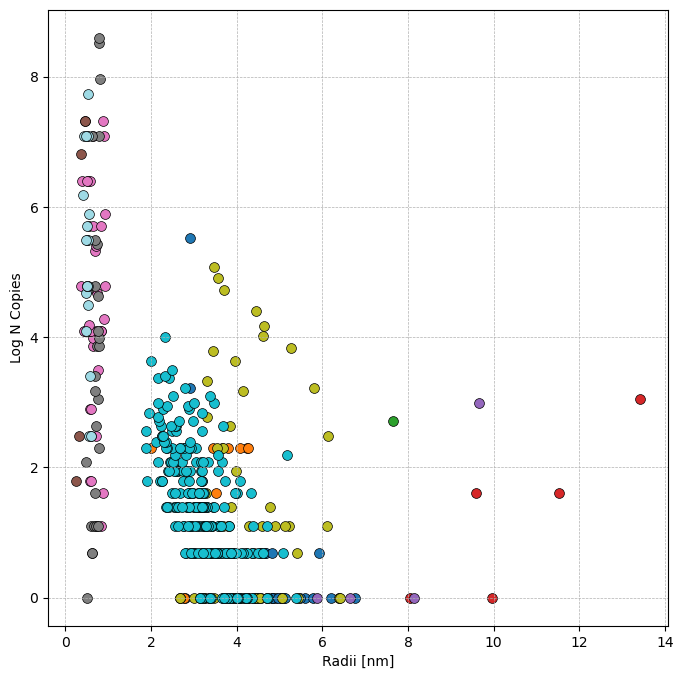

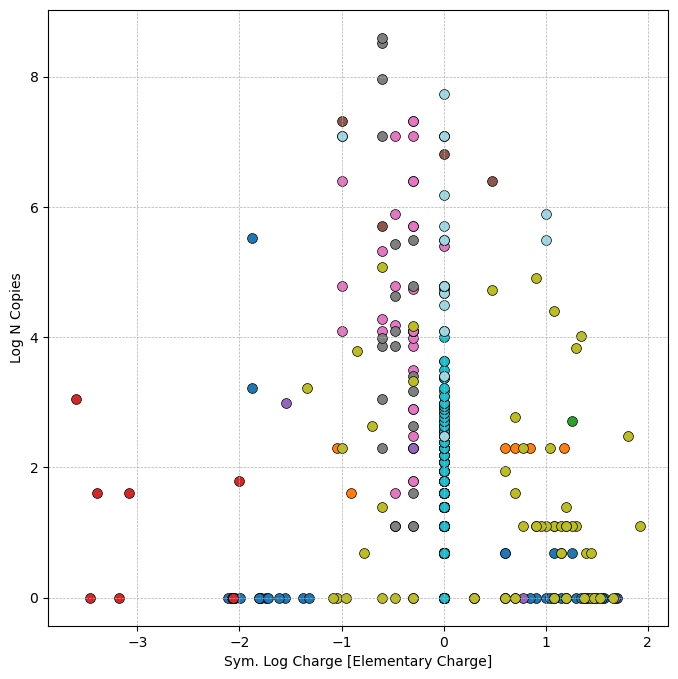

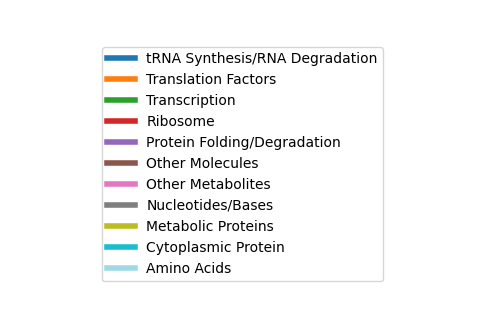

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the Excel file
file_path = "SpeciesList-NoIons_Annotated.ods"
df = pd.read_excel(file_path)

# Extract data from columns using positional indices
radii = pd.to_numeric(df.iloc[:, 4], errors='coerce')
charge = pd.to_numeric(df.iloc[:, 1], errors='coerce')
n_copies = pd.to_numeric(df.iloc[:, 3], errors='coerce')
tags = df.iloc[:, 5]

# Custom symmetric log function
def symlog(x, linthresh=1):
    is_negative = x < 0
    abs_x = np.abs(x)
    abs_x = np.where(x == 0, 0, np.where(abs_x < linthresh, linthresh, np.log10(abs_x)))
    return np.where(is_negative, -abs_x, abs_x)

# Transform charges
charge_transformed = symlog(charge)

# Convert tags to discrete colors
unique_tags = tags.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_tags)))
tag_to_color = {tag: color for tag, color in zip(unique_tags, colors)}

# 3D Orthographic Plot
fig_3d = plt.figure(figsize=(8, 8))
ax1 = fig_3d.add_subplot(111, projection='3d')
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax1.scatter(radii[mask], charge_transformed[mask], np.log(n_copies[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax1.set_xlabel('Radii [nm]')
ax1.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax1.set_zlabel('Log N Copies')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.ticklabel_format(style='plain', axis='z', scilimits=(0,0))
ax1.view_init(elev=30, azim=300)
ax1.grid(True)
ax1.set_facecolor('white')
fig_3d.savefig('NoWat_Number_3D_Orthographic_Plot.svg')
plt.show()

# 2D Projection - Radii and Charge
fig_2d_rc = plt.figure(figsize=(8, 8))
ax2 = fig_2d_rc.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax2.scatter(radii[mask], charge_transformed[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax2.set_xlabel('Radii [nm]')
ax2.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_facecolor('white')
fig_2d_rc.savefig('NoWat_Number_2D_Projection_Radii_Charge.svg')
plt.show()

# 2D Projection - Log N Copies & Radii
fig_2d_ac = plt.figure(figsize=(8, 8))
ax3 = fig_2d_ac.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax3.scatter(radii[mask], np.log(n_copies[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax3.set_xlabel('Radii [nm]')
ax3.set_ylabel('Log N Copies')
ax3.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.set_facecolor('white')
fig_2d_ac.savefig('NoWat_Number_2D_Projection_Radii_Abundance.svg')
plt.show()

# 2D Projection - Log N Copies & Sym. Log Charge
fig_2d_ar = plt.figure(figsize=(8, 8))
ax4 = fig_2d_ar.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax4.scatter(charge_transformed[mask], np.log(n_copies[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax4.set_xlabel('Sym. Log Charge [Elementary Charge]')
ax4.set_ylabel('Log N Copies')
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
ax4.set_facecolor('white')
fig_2d_ar.savefig('NoWat_Number_2D_Projection_Charge_Abundance.svg')
plt.show()

# Creating and saving a separate plot for the legend
fig_legend = plt.figure(figsize=(6, 4))
ax_legend = fig_legend.add_subplot(111)
# Create dummy lines for the legend
legend_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in tag_to_color.values()]
# Add the legend to the plot
ax_legend.legend(legend_lines, unique_tags, loc='center')
ax_legend.axis('off')  # Hide the axes
fig_legend.savefig('NoWat_Number_Plot_Legend.svg')
plt.show()

/usr/lib64/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


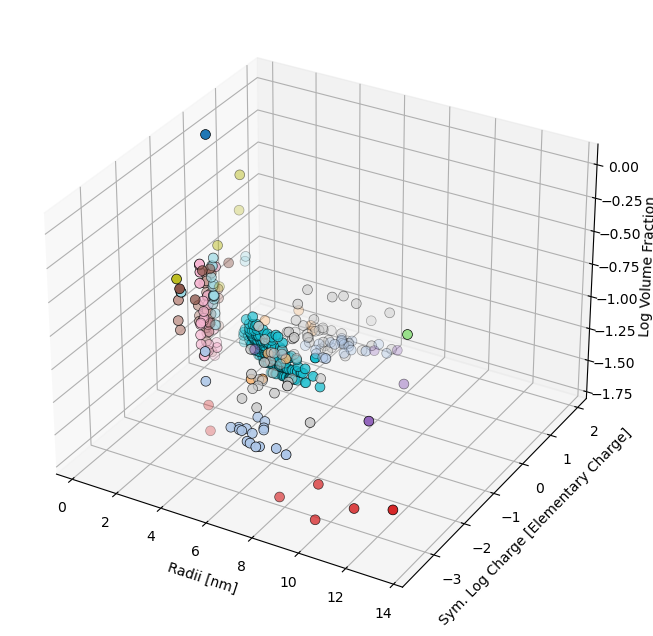

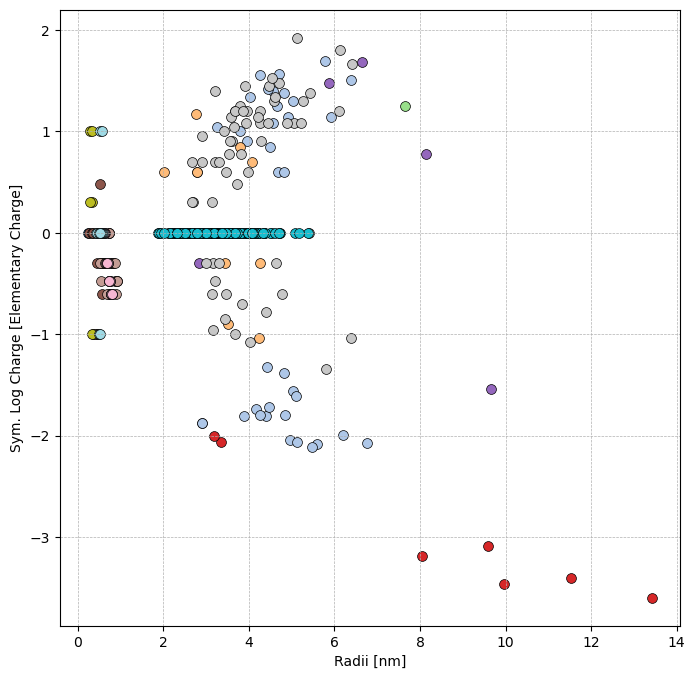

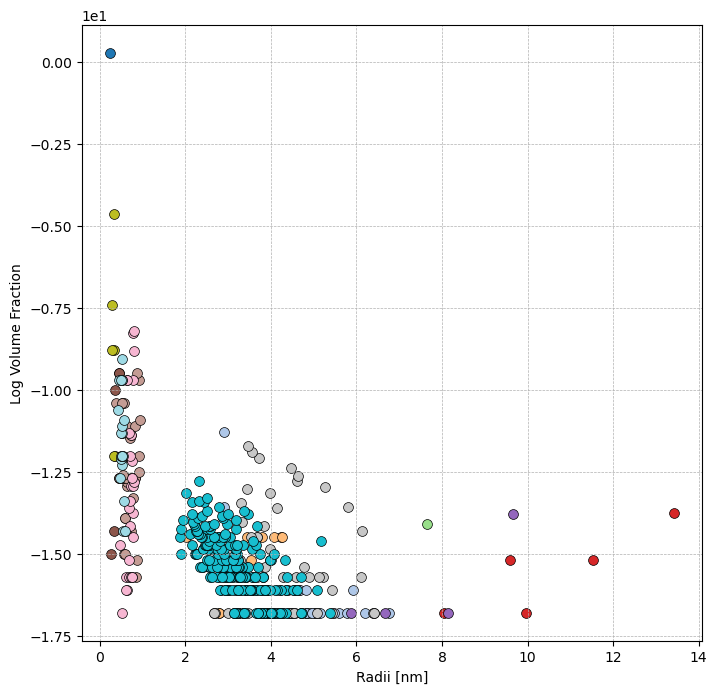

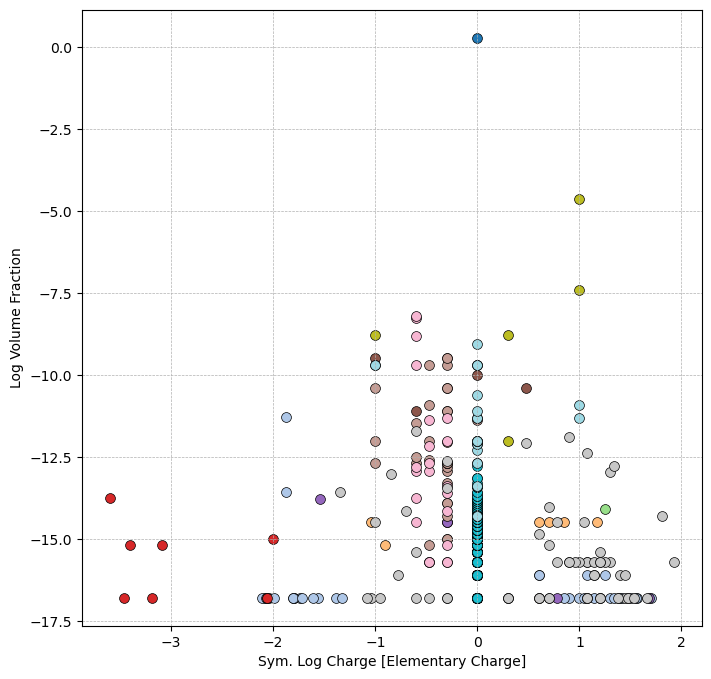

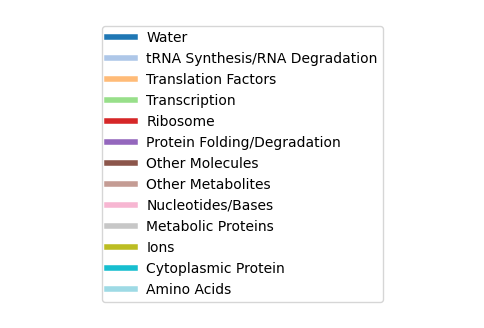

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the Excel file
file_path = "SpeciesList_Annotated.ods"
df = pd.read_excel(file_path)

# Extract data from columns using positional indices
radii = pd.to_numeric(df.iloc[:, 4], errors='coerce')
charge = pd.to_numeric(df.iloc[:, 1], errors='coerce')
n_copies = pd.to_numeric(df.iloc[:, 3], errors='coerce')
tags = df.iloc[:, 5]

# Custom symmetric log function
def symlog(x, linthresh=1):
    is_negative = x < 0
    abs_x = np.abs(x)
    abs_x = np.where(x == 0, 0, np.where(abs_x < linthresh, linthresh, np.log10(abs_x)))
    return np.where(is_negative, -abs_x, abs_x)

# Calculate volume fraction
total_volume = np.pi * np.power(radii, 3) * n_copies.sum()
volume_fraction = ((4/3) * np.pi * np.power(radii, 3) * n_copies) / total_volume
log_volume_fraction = np.log(volume_fraction)

# Convert tags to discrete colors
unique_tags = tags.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_tags)))
tag_to_color = {tag: color for tag, color in zip(unique_tags, colors)}

# 3D Orthographic Plot
fig_3d = plt.figure(figsize=(8, 8))
ax1 = fig_3d.add_subplot(111, projection='3d')
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax1.scatter(radii[mask], symlog(charge[mask]), log_volume_fraction[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax1.set_xlabel('Radii [nm]')
ax1.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax1.set_zlabel('Log Volume Fraction')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
ax1.grid(True)
ax1.set_facecolor('white')
fig_3d.savefig('Full_VolFrac_3D_Orthographic_Plot_VolFrac.svg')
plt.show()

# 2D Projection - Radii and Sym. Log Charge
fig_2d_rc = plt.figure(figsize=(8, 8))
ax2 = fig_2d_rc.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax2.scatter(radii[mask], symlog(charge[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax2.set_xlabel('Radii [nm]')
ax2.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_facecolor('white')
fig_2d_rc.savefig('Full_VolFrac_2D_Projection_Radii_Charge_VolFrac.svg')
plt.show()

# 2D Projection - Radii and Log Volume Fraction
fig_2d_rv = plt.figure(figsize=(8, 8))
ax3 = fig_2d_rv.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax3.scatter(radii[mask], log_volume_fraction[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax3.set_xlabel('Radii [nm]')
ax3.set_ylabel('Log Volume Fraction')
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.set_facecolor('white')
fig_2d_rv.savefig('Full_VolFrac_2D_Projection_Radii_VolFrac.svg')
plt.show()

# 2D Projection - Sym. Log Charge and Log Volume Fraction
fig_2d_cv = plt.figure(figsize=(8, 8))
ax4 = fig_2d_cv.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax4.scatter(symlog(charge[mask]), log_volume_fraction[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax4.set_xlabel('Sym. Log Charge [Elementary Charge]')
ax4.set_ylabel('Log Volume Fraction')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
ax4.set_facecolor('white')
fig_2d_cv.savefig('Full_VolFrac_2D_Projection_Charge_VolFrac.svg')
plt.show()

# Creating and saving a separate plot for the legend
fig_legend = plt.figure(figsize=(6, 4))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend([plt.Line2D([0], [0], color=color, lw=4) for color in tag_to_color.values()], unique_tags, loc='center')
ax_legend.axis('off')
fig_legend.savefig('Full_VolFrac_Plot_Legend_VolFrac.svg')
plt.show()


/usr/lib64/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


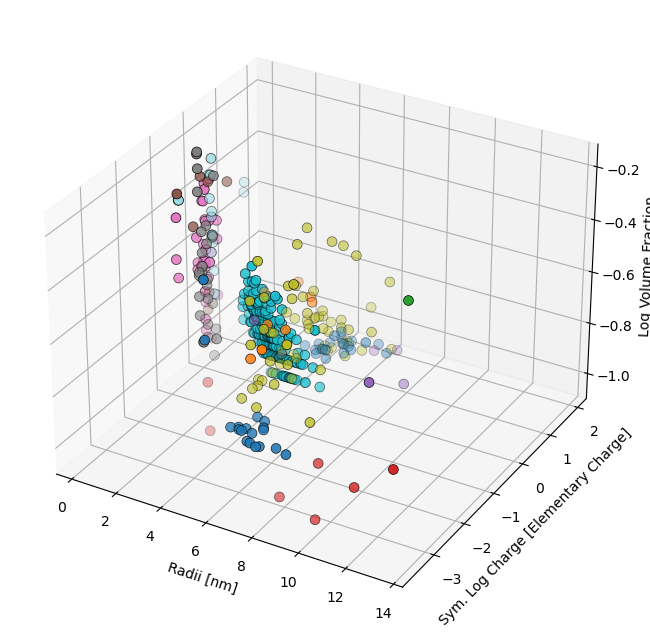

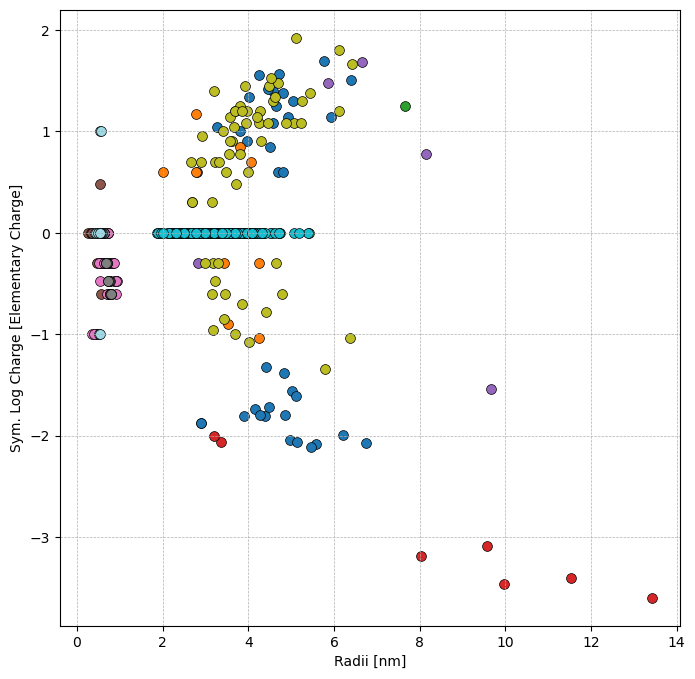

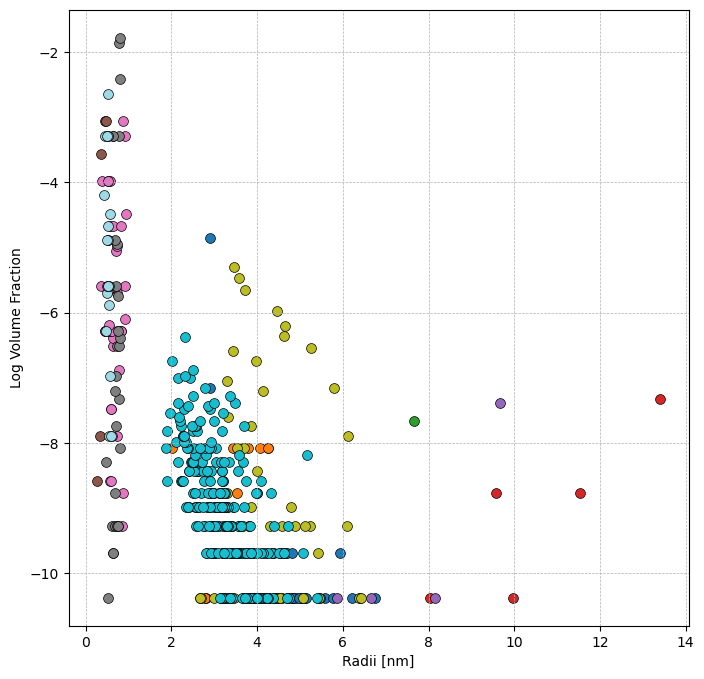

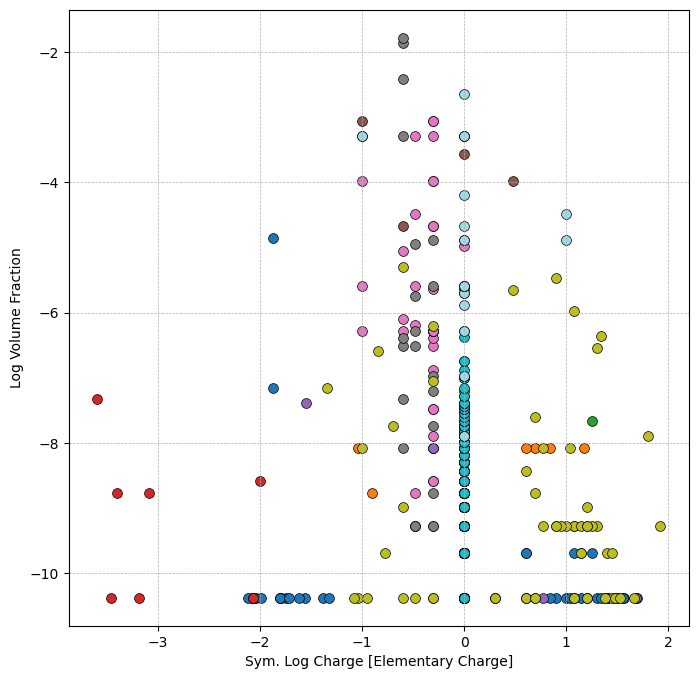

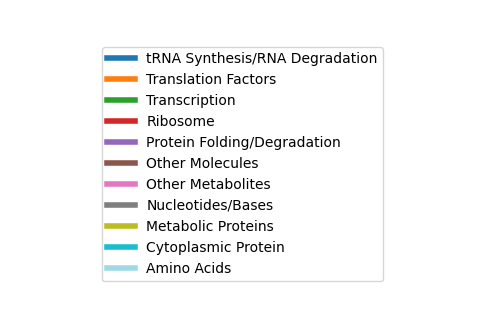

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the Excel file
file_path = "SpeciesList-NoIons_Annotated.ods"
df = pd.read_excel(file_path)

# Extract data from columns using positional indices
radii = pd.to_numeric(df.iloc[:, 4], errors='coerce')
charge = pd.to_numeric(df.iloc[:, 1], errors='coerce')
n_copies = pd.to_numeric(df.iloc[:, 3], errors='coerce')
tags = df.iloc[:, 5]

# Custom symmetric log function
def symlog(x, linthresh=1):
    is_negative = x < 0
    abs_x = np.abs(x)
    abs_x = np.where(x == 0, 0, np.where(abs_x < linthresh, linthresh, np.log10(abs_x)))
    return np.where(is_negative, -abs_x, abs_x)

# Calculate volume fraction
total_volume = np.pi * np.power(radii, 3) * n_copies.sum()
volume_fraction = ((4/3) * np.pi * np.power(radii, 3) * n_copies) / total_volume
log_volume_fraction = np.log(volume_fraction)

# Convert tags to discrete colors
unique_tags = tags.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_tags)))
tag_to_color = {tag: color for tag, color in zip(unique_tags, colors)}

# 3D Orthographic Plot
fig_3d = plt.figure(figsize=(8, 8))
ax1 = fig_3d.add_subplot(111, projection='3d')
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax1.scatter(radii[mask], symlog(charge[mask]), log_volume_fraction[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax1.set_xlabel('Radii [nm]')
ax1.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax1.set_zlabel('Log Volume Fraction')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
ax1.grid(True)
ax1.set_facecolor('white')
fig_3d.savefig('NoWat_VolFrac_3D_Orthographic_Plot_NoIons_VolFrac.svg')
plt.show()

# 2D Projection - Radii and Sym. Log Charge
fig_2d_rc = plt.figure(figsize=(8, 8))
ax2 = fig_2d_rc.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax2.scatter(radii[mask], symlog(charge[mask]), color=color, s=50, edgecolors='k', linewidths=0.5)
ax2.set_xlabel('Radii [nm]')
ax2.set_ylabel('Sym. Log Charge [Elementary Charge]')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_facecolor('white')
fig_2d_rc.savefig('NoWat_VolFrac_2D_Projection_Radii_Charge_NoIons_VolFrac.svg')
plt.show()

# 2D Projection - Radii and Log Volume Fraction
fig_2d_rv = plt.figure(figsize=(8, 8))
ax3 = fig_2d_rv.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax3.scatter(radii[mask], log_volume_fraction[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax3.set_xlabel('Radii [nm]')
ax3.set_ylabel('Log Volume Fraction')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.set_facecolor('white')
fig_2d_rv.savefig('NoWat_VolFrac_2D_Projection_Radii_VolFrac_NoIons.svg')
plt.show()

# 2D Projection - Sym. Log Charge and Log Volume Fraction
fig_2d_cv = plt.figure(figsize=(8, 8))
ax4 = fig_2d_cv.add_subplot(111)
for tag, color in tag_to_color.items():
    mask = tags == tag
    ax4.scatter(symlog(charge[mask]), log_volume_fraction[mask], color=color, s=50, edgecolors='k', linewidths=0.5)
ax4.set_xlabel('Sym. Log Charge [Elementary Charge]')
ax4.set_ylabel('Log Volume Fraction')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
ax4.set_facecolor('white')
fig_2d_cv.savefig('NoWat_VolFrac_2D_Projection_Charge_VolFrac_NoIons.svg')
plt.show()

# Creating and saving a separate plot for the legend
fig_legend = plt.figure(figsize=(6, 4))
ax_legend = fig_legend.add_subplot(111)
ax_legend.legend([plt.Line2D([0], [0], color=color, lw=4) for color in tag_to_color.values()], unique_tags, loc='center')
ax_legend.axis('off')
fig_legend.savefig('NoWat_VolFrac_Plot_Legend_NoIons_VolFrac.svg')
plt.show()
